<a href="https://colab.research.google.com/github/amirkasaei/Neural-Network-from-Scratch/blob/main/Neural_Network_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Libraries & Constants***

In [1]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# ***Preprocessing***

Reading & displaying data:

In [9]:
url = 'https://raw.githubusercontent.com/amirkasaei/Neural-Network-from-Scratch/main/Dataset/Dataset.csv'

In [10]:
df = pd.read_csv(url)
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [11]:
print(df.shape)

(480, 17)


In [12]:
# name of each column in dataset
categorical_attr = ['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class']

In [13]:
# Converting Categorical values to scaler values
le = LabelEncoder()
df[categorical_attr] = df[categorical_attr].apply(le.fit_transform, axis=0)

In [14]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,4,4,2,1,0,7,0,0,15,16,2,20,1,1,1,2
1,1,4,4,2,1,0,7,0,0,20,20,3,25,1,1,1,2
2,1,4,4,2,1,0,7,0,0,10,7,0,30,0,0,0,1
3,1,4,4,2,1,0,7,0,0,30,25,5,35,0,0,0,1
4,1,4,4,2,1,0,7,0,0,40,50,12,50,0,0,0,2


In [15]:
# X: Features, y: Classes
X = np.array(df.iloc[:, :-1])
y = np.array(df['Class'])

In [16]:
# change Y classification into binary classification
for i in range(len(y)):
  if y[i] == 2 or y[i] == 0:
    y[i] = 1
  elif y[i] == 1:
    y[i] = 0

In [17]:
# Deviding Dataset to training and validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=12)

In [18]:
print('Number of dataset: ', len(X))
print('Number of train set: ', len(X_train))
print('Number of validation set: ', len(X_val))

Number of dataset:  480
Number of train set:  384
Number of validation set:  96


In [19]:
# changing X dimension to m columns instead of m rows
X_train = X_train.T
X_val = X_val.T

# ***Implementation***

In [21]:
def init_params(zero):
  alpha = 0.1
  if zero: # intialize to zero
    W1 = np.zeros((8, 16))
    b1 = np.zeros((1, 1))
    W2 = np.zeros((4, 8))
    b2 = np.zeros((1, 1))
    W3 = np.zeros((2, 4))
    b3 = np.zeros((1, 1))
    W4 = np.zeros((1, 2))
    b4 = np.zeros((1, 1))
  else: # random initialization
    W1 = np.random.randn(8, 16)
    b1 = np.random.randn(1, 1)
    W2 = np.random.randn(4, 8)
    b2 = np.random.randn(1, 1)
    W3 = np.random.randn(2, 4)
    b3 = np.random.randn(1, 1)
    W4 = np.random.randn(1, 2)
    b4 = np.random.randn(1, 1)
  return W4, b4, W3, b3, W2, b2, W1, b1, alpha
    
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
  return np.exp(-x) / ((1 + np.exp(-x)) ** 2)

def forward_prop(W4, b4, W3, b3, W2, b2, W1, b1, A0):
  Z1 = np.dot(W1, A0) + b1
  A1 = sigmoid(Z1)
  Z2 = np.dot(W2, A1) + b2
  A2 = sigmoid(Z2)
  Z3 = np.dot(W3, A2) + b3
  A3 = sigmoid(Z3)
  Z4 = np.dot(W4, A3) + b4
  A4 = sigmoid(Z4)
  return A4, Z4, A3, Z3, A2, Z2, A1, Z1


def backward_prop(A4, A3, A2, A1, A0, Y):
  # number of examples
  m = Y.shape[0]

  dZ4 = A4 - Y
  dW4 = (1 / m) * np.dot(dZ4, A3.T)
  db4 = (1 / m) * np.sum(dZ4, axis = 1, keepdims = True)

  dZ3 = np.multiply(np.dot(W4.T, dZ4), A3 - np.power(A3, 2))
  dW3 = (1 / m) * np.dot(dZ3, A2.T)
  db3 = (1 / m) * np.sum(dZ3, axis = 1, keepdims = True)

  dZ2 = np.multiply(np.dot(W3.T, dZ3), A2 - np.power(A2, 2))
  dW2 = (1 / m) * np.dot(dZ2, A1.T)
  db2 = (1 / m) * np.sum(dZ2, axis = 1, keepdims = True)

  dZ1 = np.multiply(np.dot(W2.T, dZ2), A1 - np.power(A1, 2))
  dW1 = (1 / m) * np.dot(dZ1, A0.T)
  db1 = (1 / m) * np.sum(dZ1, axis = 1, keepdims = True)

  return dW4, db4, dW3, db3, dW2, db2, dW1, db1

def cost_func(A, Y):
  # limit A to prevent divide by zero in log(A) and log(1-A)
  A_clipped = np.clip(A, 10**-16, 0.9999999999999999)

  # compute cost
  cost = np.multiply(np.log(A_clipped), Y) + np.multiply((1 - Y), np.log(1 - A_clipped))
  return cost

def loss_func(A, Y):
  # number of examples
  m = Y.shape[0]

  #compute cost
  cost = cost_func(A, Y)

  # compte loss usnig cost
  loss = - np.sum(cost) / m
  return loss

def accuracy_func(A, Y):
  # number of examples
  m = Y.shape[0]
  
  # assume true if (y - y_hat) <= 0.5
  return (np.sum(np.isclose(A, Y, 10**-16, 0.5)) / m ) * 100

def print_output(train, val):
  print("Training Set:")
  for j in range(len(train)):
    print("  ", train[j][0], ") loss = ", train[j][1], "***** accuracy = ", train[j][2])

  print("\nValidation Set:")
  for j in range(len(val)):
    print("  ", val[j][0], ") loss = ", val[j][1], "***** accuracy = ", val[j][2])

def draw_plot(x, y, label, title):
  plt.plot(x, y, label = label)

  # naming the x axis
  plt.xlabel("iteration")

  # naming the y axis
  plt.ylabel(label)

  # giving a title to my graph
  plt.title(title)
  
  # show a legend on the plot
  plt.legend()
  
  # function to show the plot
  plt.show()

def draw_all_plots(train, val):
  draw_plot(train[:, 0], train[:, 1], "loss", "Training set loss")
  draw_plot(train[:, 0], train[:, 2], "accuracy", "Training set accuracy")
  draw_plot(val[:, 0], val[:, 1], "loss", "Validation set loss")
  draw_plot(val[:, 0], val[:, 2], "accuracy", "Validation set accuracy")

# ***Training the model***

***traning, loss and accuracy calculation***

In [ ]:
W4, b4, W3, b3, W2, b2, W1, b1, alpha = init_params(zero = False)

# training set loss and accuracy
train_loss_and_accuracy = []

# validation set loss and accuracy
val_loss_and_accuracy = []

# number of iterations
iteration = 40000;

for i in range(iteration):

  # forward propagation
  A4, Z4, A3, Z3, A2, Z2, A1, Z1 = forward_prop(W4, b4, W3, b3, W2, b2, W1, b1, X_train)

  # backward propagation
  dW4, db4, dW3, db3, dW2, db2, dW1, db1 = backward_prop(A4, A3, A2, A1, X_train, y_train)

  # update params
  W1 = W1 - alpha * dW1
  b1 = b1 - alpha * db1
  W2 = W2 - alpha * dW2
  b2 = b2 - alpha * db2
  W3 = W3 - alpha * dW3
  b3 = b3 - alpha * db3
  W4 = W4 - alpha * dW4
  b4 = b4 - alpha * db4
  
  # calculate and print loss and accuracy every 100 iteration for train and val set
  if i == 9 or (i + 1) % (iteration / 10) == 0:

    # loss and accuracy calculation for training set
    train_loss_and_accuracy.append([i + 1, loss_func(A4, y_train), accuracy_func(A4, y_train)])

    # forward propagation for validation set
    A4, Z4, A3, Z3, A2, Z2, A1, Z1 = forward_prop(W4, b4, W3, b3, W2, b2, W1, b1, X_val)

    # loss function and accuracy for validation set
    val_loss_and_accuracy.append([i + 1, loss_func(A4, y_val), accuracy_func(A4, y_val)])

# print outputs for both training and validation set
print_output(train_loss_and_accuracy, val_loss_and_accuracy)

# create numpy array
train_loss_and_accuracy = np.array(train_loss_and_accuracy)
val_loss_and_accuracy = np.array(val_loss_and_accuracy) 

Training Set:
   10 ) loss =  0.6608813965402939 ***** accuracy =  72.39583333333334
   4000 ) loss =  0.25907715100701795 ***** accuracy =  90.36458333333334
   8000 ) loss =  0.24733394655263843 ***** accuracy =  90.625
   12000 ) loss =  0.1622023086135031 ***** accuracy =  95.3125
   16000 ) loss =  0.11928188283810692 ***** accuracy =  97.13541666666666
   20000 ) loss =  0.10828935112413651 ***** accuracy =  97.39583333333334
   24000 ) loss =  0.09893418373244274 ***** accuracy =  97.65625
   28000 ) loss =  0.0969553482938994 ***** accuracy =  97.65625
   32000 ) loss =  0.09620165237846312 ***** accuracy =  97.65625
   36000 ) loss =  0.12070450457102792 ***** accuracy =  95.57291666666666
   40000 ) loss =  0.09543851490754197 ***** accuracy =  97.65625

Validation Set:
   10 ) loss =  0.647239733431818 ***** accuracy =  78.125
   4000 ) loss =  0.36748511425724906 ***** accuracy =  82.29166666666666
   8000 ) loss =  0.29417559354300704 ***** accuracy =  89.58333333333334
  

***plots***

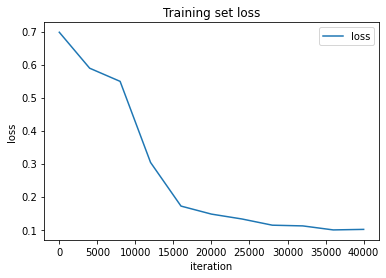

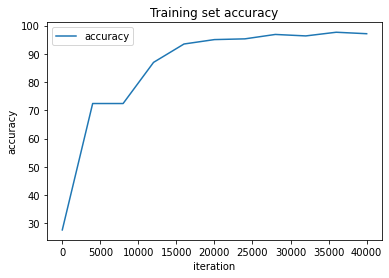

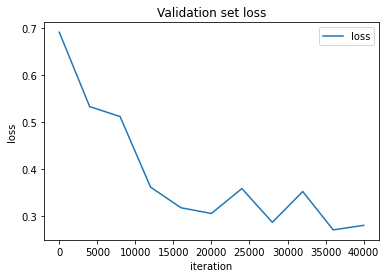

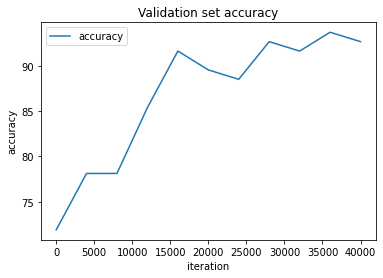

In [ ]:
draw_all_plots(train_loss_and_accuracy, val_loss_and_accuracy)